In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import speech_recognition as sr

In [2]:
filepath = "../data/NRC/NRC-VAD-Lexicon.txt"
emo_dict = pd.read_csv(filepath,  names=["valence", "arousal", "dominance"], skiprows=45, sep='\t')
emo_dict.head(12)
print("Number of words: ", len(emo_dict))

Number of words:  19963


In [3]:
r = sr.Recognizer()

harvard = sr.AudioFile('../data/lectures/MIT_Deep_Learning_Lecture.wav')
with harvard as source:
    audio = r.record(source, offset=1200, duration=180)

text = r.recognize_google(audio)
print(text)

words = text.split(' ')
print(words)


really clean example of unintended consequences ethical issues we have to really think about when an algorithm learns from data base and an objective function a loss function the power the consequences of an algorithm that optimize that function is not always obvious here's an example of a human player playing the game of Coast Runners with a it's a boat racing game where the task is to go around the racetrack and try to win the race and the objective is to get as many points as possible there are three ways to get points the finishing time how long it took you to finish the finishing position where you were in the ranking and picking up quote on quote turbos those little green things along the way they give you points look at the difference the distinction the level degrees of what they arguments accomplishing for example image classification is not necessary
['really', 'clean', 'example', 'of', 'unintended', 'consequences', 'ethical', 'issues', 'we', 'have', 'to', 'really', 'think', 

In [4]:
def get_vad_scores(words):
    scores = []
    for w in words:
        try:
            value = emo_dict.loc[w]
            scores.append([w, round(value[0], 2), round(value[1], 2), round(value[2], 2)])
        except KeyError:
            pass
            scores.append([w, 0.5, 0.5, 0.5])

    print('\n'.join(str(element) for element in scores))
    vad = [score[1:] for score in scores]
    return vad

In [5]:
vad = get_vad_scores(words)

['really', 0.5, 0.5, 0.5]
['clean', 0.83, 0.17, 0.5]
['example', 0.54, 0.34, 0.51]
['of', 0.5, 0.5, 0.5]
['unintended', 0.44, 0.38, 0.35]
['consequences', 0.5, 0.5, 0.5]
['ethical', 0.85, 0.32, 0.63]
['issues', 0.5, 0.5, 0.5]
['we', 0.5, 0.5, 0.5]
['have', 0.76, 0.39, 0.59]
['to', 0.5, 0.5, 0.5]
['really', 0.5, 0.5, 0.5]
['think', 0.79, 0.41, 0.62]
['about', 0.5, 0.5, 0.5]
['when', 0.5, 0.5, 0.5]
['an', 0.5, 0.5, 0.5]
['algorithm', 0.45, 0.39, 0.56]
['learns', 0.5, 0.5, 0.5]
['from', 0.5, 0.5, 0.5]
['data', 0.5, 0.25, 0.43]
['base', 0.64, 0.3, 0.55]
['and', 0.5, 0.5, 0.5]
['an', 0.5, 0.5, 0.5]
['objective', 0.72, 0.34, 0.74]
['function', 0.69, 0.3, 0.62]
['a', 0.5, 0.5, 0.5]
['loss', 0.06, 0.57, 0.21]
['function', 0.69, 0.3, 0.62]
['the', 0.5, 0.5, 0.5]
['power', 0.72, 0.67, 0.95]
['the', 0.5, 0.5, 0.5]
['consequences', 0.5, 0.5, 0.5]
['of', 0.5, 0.5, 0.5]
['an', 0.5, 0.5, 0.5]
['algorithm', 0.45, 0.39, 0.56]
['that', 0.5, 0.5, 0.5]
['optimize', 0.5, 0.5, 0.5]
['that', 0.5, 0.5, 0.5]
[

In [6]:
def moving_average(a, n=30) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

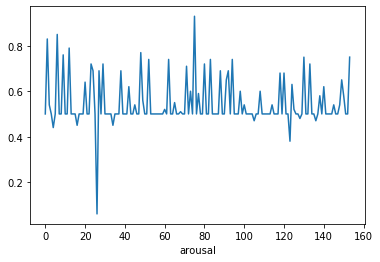

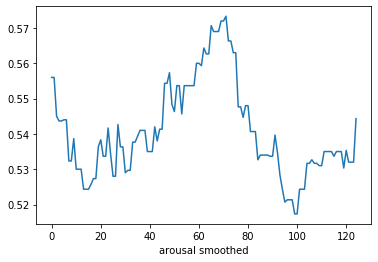

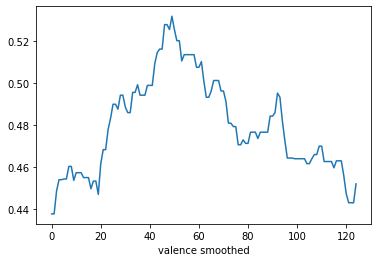

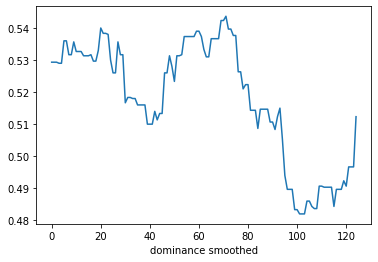

In [7]:
arr = np.array(vad)

arousal = arr[:, 0]
plt.plot(arousal)
plt.xlabel("arousal")
plt.show()

smoothed = moving_average(arousal)
plt.plot(smoothed)
plt.xlabel("arousal smoothed")
plt.show()

valance = arr[:, 1]
smoothed = moving_average(valance)
plt.plot(smoothed)
plt.xlabel("valence smoothed")
plt.show()

valance = arr[:, 2]
smoothed = moving_average(valance)
plt.plot(smoothed)
plt.xlabel("dominance smoothed")
plt.show()